In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
incident = pd.read_csv('donneesouvertes-interventions-sim.csv')


In [3]:
incident.head()

,INCIDENT_NBR,CREATION_DATE_TIME,INCIDENT_TYPE_DESC,DESCRIPTION_GROUPE,CASERNE,NOM_VILLE,NOM_ARROND,DIVISION,NOMBRE_UNITES,CIV,MTM8_X,MTM8_Y,LONGITUDE,LATITUDE
0,14671,2015-02-08T20:14:04,Structure dangereuse,SANS FEU,41,Montréal,Villeray / St-Michel / Parc Extension,8,1.0,NaN,295191.1,5043245.4,-73.623018,45.529059
1,14701,2015-02-08T22:06:30,Appel de Cie de détection,Alarmes-incendies,28,Montréal,Anjou,9,6.0,1.0,299947.0,5050604.9,-73.562204,45.595332
2,14707,2015-02-08T22:37:57,Premier répondant,1-REPOND,39,Montréal,Mercier / Hochelaga-Maisonneuve,7,1.0,1.0,302268.2,5048767.1,-73.532442,45.578807
3,15481,2015-02-11T02:27:20,Premier répondant,1-REPOND,29,Montréal,Rosemont / Petite-Patrie,7,1.0,1.0,299604.2,5045286.9,-73.566541,45.547476
4,15483,2015-02-11T03:27:29,Premier répondant,1-REPOND,8,Montréal-Est,Indéterminé,9,1.0,1.0,303349.7,5052541.2,-73.518596,45.612770


## CHECKING NAN VALUES

In [4]:
incident.isna().sum()

INCIDENT_NBR              0
CREATION_DATE_TIME        0
INCIDENT_TYPE_DESC        0
DESCRIPTION_GROUPE       22
CASERNE                   0
NOM_VILLE                 0
NOM_ARROND                0
DIVISION                  0
NOMBRE_UNITES           212
CIV                   80405
MTM8_X                    0
MTM8_Y                    0
LONGITUDE                 0
LATITUDE                  0
dtype: int64

As we can see, there are 22 NAN records for description column so we will drpop them.

In [5]:
incident.dropna(subset=["DESCRIPTION_GROUPE"],inplace=True)

In [6]:
incident.isna().sum()

INCIDENT_NBR              0
CREATION_DATE_TIME        0
INCIDENT_TYPE_DESC        0
DESCRIPTION_GROUPE        0
CASERNE                   0
NOM_VILLE                 0
NOM_ARROND                0
DIVISION                  0
NOMBRE_UNITES           212
CIV                   80401
MTM8_X                    0
MTM8_Y                    0
LONGITUDE                 0
LATITUDE                  0
dtype: int64

In [7]:
incident.DESCRIPTION_GROUPE.value_counts()

1-REPOND             489369
SANS FEU             136124
Alarmes-incendies     86790
AUTREFEU              19503
INCENDIE               8056
FAU-ALER                654
NOUVEAU                   2
Name: DESCRIPTION_GROUPE, dtype: int64

By getting unique values of the description_group column, we can see that there seven groups of incidents in our dataset, which are first respondant','without fire','fire alarm','other fire type','fire','false alarm','new'.

In [8]:
trans_dic= {'1-REPOND':'first respondant','SANS FEU':'without fire', 'Alarmes-incendies': 'fire alarm', 'AUTREFEU':'other fire type','INCENDIE':'fire', 'FAU-ALER':'false alarm', 'NOUVEAU':'new'}

In [9]:
incident.DESCRIPTION_GROUPE = incident.DESCRIPTION_GROUPE.map(trans_dic)

For a better understanding of the dataset, these groupings were replaced with their English translations.

In [10]:
incident.head()

,INCIDENT_NBR,CREATION_DATE_TIME,INCIDENT_TYPE_DESC,DESCRIPTION_GROUPE,CASERNE,NOM_VILLE,NOM_ARROND,DIVISION,NOMBRE_UNITES,CIV,MTM8_X,MTM8_Y,LONGITUDE,LATITUDE
0,14671,2015-02-08T20:14:04,Structure dangereuse,without fire,41,Montréal,Villeray / St-Michel / Parc Extension,8,1.0,NaN,295191.1,5043245.4,-73.623018,45.529059
1,14701,2015-02-08T22:06:30,Appel de Cie de détection,fire alarm,28,Montréal,Anjou,9,6.0,1.0,299947.0,5050604.9,-73.562204,45.595332
2,14707,2015-02-08T22:37:57,Premier répondant,first respondant,39,Montréal,Mercier / Hochelaga-Maisonneuve,7,1.0,1.0,302268.2,5048767.1,-73.532442,45.578807
3,15481,2015-02-11T02:27:20,Premier répondant,first respondant,29,Montréal,Rosemont / Petite-Patrie,7,1.0,1.0,299604.2,5045286.9,-73.566541,45.547476
4,15483,2015-02-11T03:27:29,Premier répondant,first respondant,8,Montréal-Est,Indéterminé,9,1.0,1.0,303349.7,5052541.2,-73.518596,45.612770


In [11]:
len(incident)

740498

This a dataset related to incidents which were addressed by Montreal fire department. It contains 740520 incidents from 2015 till present. each incident has its unique identifying number, its creation date, the city,neighborhood, type of incident, the longitude and latitude of the incident and other useful information.

# DATA EXPLORATION AND VISUALIZATION


## DIFFERENT INCIDTENS ANALYSIS

In [12]:
fire_gr = incident.DESCRIPTION_GROUPE.value_counts()
fire_gr = fire_gr.to_frame()
fire_gr =fire_gr.reset_index()

In [13]:
fire_gr.columns = ['fire_type', 'count']
fire_gr.head()

,fire_type,count
0,first respondant,489369
1,without fire,136124
2,fire alarm,86790
3,other fire type,19503
4,fire,8056


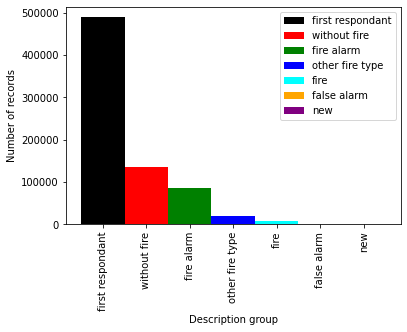

In [14]:
my_colors = ['black', 'red', 'green', 'blue', 'cyan','orange','purple']
labels = list(fire_gr['fire_type'].values)
for x,y,c,lb in zip(fire_gr['fire_type'],fire_gr['count'],my_colors,labels):
    plt.bar(x, y, 1, color=c,label=lb)

plt.legend()
plt.xlabel('Description group')
plt.xticks(rotation=90)
plt.ylabel('Number of records')
plt.show()

It is clear from the bar chart that majority of the incidents were first respondents, without fire, and fire alarms.However, the proportion for new and false alarms was negligible.
As our main focus is on the fire incidents, we will focus on them by not considering other incident types.

## ANALYZING FIRE INCIDENTS BY MONTH

In the first step, we extract month names from the date when each incident occured.

In [15]:
incident['New_dt'] =pd.to_datetime(incident['CREATION_DATE_TIME']) 

In [16]:
incident['Day']=incident['New_dt'].dt.strftime("%A")

In [17]:
incident['Month']=incident['New_dt'].dt.month_name()

In [18]:
def is_weekend(day):
    if day.lower()=='sunday' or day.lower()=='saturday':
        return True
    else:
        return False

In [19]:
incident['weekend'] = incident['Day'].apply(is_weekend)

In [20]:
incident.head()

,INCIDENT_NBR,CREATION_DATE_TIME,INCIDENT_TYPE_DESC,DESCRIPTION_GROUPE,CASERNE,NOM_VILLE,NOM_ARROND,DIVISION,NOMBRE_UNITES,CIV,MTM8_X,MTM8_Y,LONGITUDE,LATITUDE,New_dt,Day,Month,weekend
0,14671,2015-02-08T20:14:04,Structure dangereuse,without fire,41,Montréal,Villeray / St-Michel / Parc Extension,8,1.0,NaN,295191.1,5043245.4,-73.623018,45.529059,2015-02-08 20:14:04,Sunday,February,True
1,14701,2015-02-08T22:06:30,Appel de Cie de détection,fire alarm,28,Montréal,Anjou,9,6.0,1.0,299947.0,5050604.9,-73.562204,45.595332,2015-02-08 22:06:30,Sunday,February,True
2,14707,2015-02-08T22:37:57,Premier répondant,first respondant,39,Montréal,Mercier / Hochelaga-Maisonneuve,7,1.0,1.0,302268.2,5048767.1,-73.532442,45.578807,2015-02-08 22:37:57,Sunday,February,True
3,15481,2015-02-11T02:27:20,Premier répondant,first respondant,29,Montréal,Rosemont / Petite-Patrie,7,1.0,1.0,299604.2,5045286.9,-73.566541,45.547476,2015-02-11 02:27:20,Wednesday,February,False
4,15483,2015-02-11T03:27:29,Premier répondant,first respondant,8,Montréal-Est,Indéterminé,9,1.0,1.0,303349.7,5052541.2,-73.518596,45.612770,2015-02-11 03:27:29,Wednesday,February,False


In the second step, we build two data frames to calculate the number of incidents for 'fire' and'other fire' types for each month, and merge them to have a single data frame.

In [21]:
fire_in_month = incident.Month[incident['DESCRIPTION_GROUPE']=='fire'].value_counts()
fire_in_month = fire_in_month.to_frame()
fire_in_month =fire_in_month.reset_index()

In [22]:
fire_in_month.head()

,index,Month
0,May,818
1,June,789
2,April,741
3,March,709
4,July,699


In [23]:
fire_in_month.columns = ['Month', 'fire_count']
fire_in_month.head()

,Month,fire_count
0,May,818
1,June,789
2,April,741
3,March,709
4,July,699


In [24]:
from sorted_months_weekdays import *

from sort_dataframeby_monthorweek import *

In [25]:
other_fire_in_month = incident.Month[incident['DESCRIPTION_GROUPE']=="other fire type"].value_counts()
other_fire_in_month = other_fire_in_month.to_frame()
other_fire_in_month = other_fire_in_month.reset_index()

In [26]:
other_fire_in_month.columns = ['Month', 'other_count']
other_fire_in_month.head()

,Month,other_count
0,June,3252
1,May,3158
2,July,2415
3,August,1936
4,April,1893


In [27]:
df_merge_fire_other_fire = pd.merge(fire_in_month, other_fire_in_month, on='Month')
df_merge_fire_other_fire.head()

,Month,fire_count,other_count
0,May,818,3158
1,June,789,3252
2,April,741,1893
3,March,709,849
4,July,699,2415


The data farme is sorted by the name od the months from january to december.

In [28]:
df_merge_fire_other_fire=Sort_Dataframeby_Month(df=df_merge_fire_other_fire,monthcolumnname='Month')

In [29]:
df_merge_fire_other_fire.head()

,Month,fire_count,other_count
0,January,684,685
1,February,633,608
2,March,709,849
3,April,741,1893
4,May,818,3158


As is seen in the graph, the proportion of fire is somhow constant throughout the year,however, the figures for other fire types are significantly highr in warm months of the year, which can be related to increased outdoor activities and festivals held at this time of the year.

## ANALYZING FIRE INCIDENTS IN DIFFERENT TIMES OF THE DAY


in the first step, we categorize 24 hours of a day into six subcategories:early morning, morning, midafternoon, evening, night, midnight

In [30]:
def hour_to_day_time(n):
    
    if 4<=n<=8:
        t = 'early morning'
    elif 8<n<=12:
        t = 'morning'
    elif 12<n<=16:
        t ='mid-afternoon'
    elif 16<n<=20:
        t = 'evening'
    elif 20<n<=24:
        t = 'night'
    else:
        t = 'midnight'
    return t

In [31]:
incident['day_time'] = incident['New_dt'].dt.hour.apply(hour_to_day_time)

In [32]:
incident.head()

,INCIDENT_NBR,CREATION_DATE_TIME,INCIDENT_TYPE_DESC,DESCRIPTION_GROUPE,CASERNE,NOM_VILLE,NOM_ARROND,DIVISION,NOMBRE_UNITES,CIV,MTM8_X,MTM8_Y,LONGITUDE,LATITUDE,New_dt,Day,Month,weekend,day_time
0,14671,2015-02-08T20:14:04,Structure dangereuse,without fire,41,Montréal,Villeray / St-Michel / Parc Extension,8,1.0,NaN,295191.1,5043245.4,-73.623018,45.529059,2015-02-08 20:14:04,Sunday,February,True,evening
1,14701,2015-02-08T22:06:30,Appel de Cie de détection,fire alarm,28,Montréal,Anjou,9,6.0,1.0,299947.0,5050604.9,-73.562204,45.595332,2015-02-08 22:06:30,Sunday,February,True,night
2,14707,2015-02-08T22:37:57,Premier répondant,first respondant,39,Montréal,Mercier / Hochelaga-Maisonneuve,7,1.0,1.0,302268.2,5048767.1,-73.532442,45.578807,2015-02-08 22:37:57,Sunday,February,True,night
3,15481,2015-02-11T02:27:20,Premier répondant,first respondant,29,Montréal,Rosemont / Petite-Patrie,7,1.0,1.0,299604.2,5045286.9,-73.566541,45.547476,2015-02-11 02:27:20,Wednesday,February,False,midnight
4,15483,2015-02-11T03:27:29,Premier répondant,first respondant,8,Montréal-Est,Indéterminé,9,1.0,1.0,303349.7,5052541.2,-73.518596,45.612770,2015-02-11 03:27:29,Wednesday,February,False,midnight


In this step, we build two dataframes to calculate the number of incidents for 'fire' and'other fire' types acoording to their subcategoires of the day and then merge them into a single data frame.

In [33]:
fire_in_daytime = incident.day_time[incident['DESCRIPTION_GROUPE']=="fire"].value_counts()
fire_in_daytime = fire_in_daytime.to_frame()
fire_in_daytime = fire_in_daytime.reset_index()

In [34]:
fire_in_daytime.columns = ['day_time', 'fire_count']
fire_in_daytime.head()

,day_time,fire_count
0,evening,1949
1,mid-afternoon,1829
2,morning,1412
3,night,978
4,early morning,964


In [35]:
other_fire_in_daytime = incident.day_time[incident['DESCRIPTION_GROUPE']=="other fire type"].value_counts()
other_fire_in_daytime = other_fire_in_daytime.to_frame()
other_fire_in_daytime = other_fire_in_daytime.reset_index()

In [36]:
other_fire_in_daytime.columns = ['day_time', 'other_count']
other_fire_in_daytime.head()

,day_time,other_count
0,evening,5237
1,mid-afternoon,4293
2,night,3625
3,morning,2412
4,midnight,2149


In [37]:
df_merge_fire_other_fire_day_time = pd.merge(fire_in_daytime, other_fire_in_daytime, on='day_time')
df_merge_fire_other_fire_day_time

,day_time,fire_count,other_count
0,evening,1949,5237
1,mid-afternoon,1829,4293
2,morning,1412,2412
3,night,978,3625
4,early morning,964,1787
5,midnight,924,2149


In [38]:
count = df_merge_fire_other_fire_day_time.fire_count
other_count = df_merge_fire_other_fire_day_time.other_count

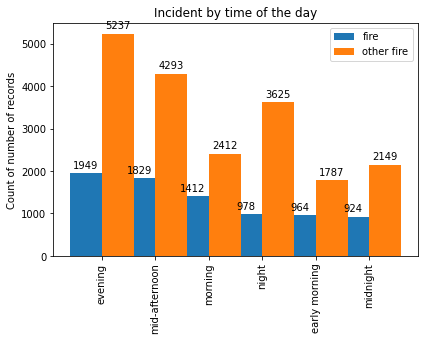

In [39]:
labels = ['evening', 'mid-afternoon', 'morning','night','early morning','midnight']

x = np.arange(len(labels))  # the label locations
width = 0.6  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, count, width, label='fire')
rects2 = ax.bar(x + width/2, other_count, width, label='other fire')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count of number of records')
ax.set_title('Incident by time of the day')
ax.set_xticks(x)

ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.xticks(rotation=90)
plt.show()

As can be seen, the rate of fire incidents in the buildings mostly happened in the evening and midafternoon, while this rate was significantly higher for other fire types at the same time and at nights.

## ANALYZING FIRE INCIDENTS DURING WEEKDAYS AND WEEKENDS

in the first step, we made two dataframes to calculate the number of incidents of fire and other fire types on weekdays and weekends, and then we merged them to a single dataframe.

In [40]:
fire_in_weekday = incident.weekend[incident['DESCRIPTION_GROUPE']=="fire"].value_counts()
fire_in_weekday = fire_in_weekday.to_frame()
fire_in_weekday = fire_in_weekday.reset_index()

In [41]:
fire_in_weekday.columns = ['weekend', 'fire_count']
fire_in_weekday.head()

,weekend,fire_count
0,False,5781
1,True,2275


In [42]:
other_fire_in_weekday = incident.weekend[incident['DESCRIPTION_GROUPE']=="other fire type"].value_counts()
other_fire_in_weekday = other_fire_in_weekday.to_frame()
other_fire_in_weekday = other_fire_in_weekday.reset_index()

In [43]:
other_fire_in_weekday.columns = ['weekend', 'other_count']
other_fire_in_weekday.head()

,weekend,other_count
0,False,13375
1,True,6128


In [44]:
df_merge_fire_other_weekend = pd.merge(fire_in_weekday, other_fire_in_weekday, on='weekend')
df_merge_fire_other_weekend

,weekend,fire_count,other_count
0,False,5781,13375
1,True,2275,6128


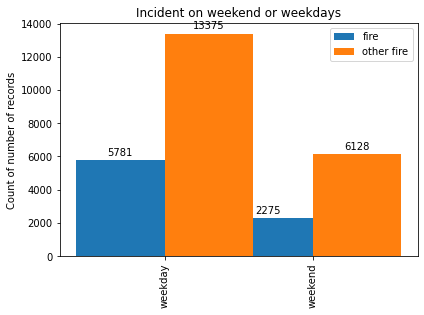

In [45]:
count = df_merge_fire_other_weekend.fire_count
other_count = df_merge_fire_other_weekend.other_count
labels = ['weekday', 'weekend']

x = np.arange(len(labels))  # the label locations
width = 0.6  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, count, width, label='fire')
rects2 = ax.bar(x + width/2, other_count, width, label='other fire')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count of number of records')
ax.set_title('Incident on weekend or weekdays')
ax.set_xticks(x)

ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.xticks(rotation=90)
plt.show()

As is clear from the chart, both fire and other fire types had higher levels on weekdays, with the other firetypes being dramatically higher.

## ANALYZING THE FIRE RATE FOR DIFFERENT YEARS.

In [46]:
incident['Year']=incident['New_dt'].dt.year
incident.head()

,INCIDENT_NBR,CREATION_DATE_TIME,INCIDENT_TYPE_DESC,DESCRIPTION_GROUPE,CASERNE,NOM_VILLE,NOM_ARROND,DIVISION,NOMBRE_UNITES,CIV,MTM8_X,MTM8_Y,LONGITUDE,LATITUDE,New_dt,Day,Month,weekend,day_time,Year
0,14671,2015-02-08T20:14:04,Structure dangereuse,without fire,41,Montréal,Villeray / St-Michel / Parc Extension,8,1.0,NaN,295191.1,5043245.4,-73.623018,45.529059,2015-02-08 20:14:04,Sunday,February,True,evening,2015
1,14701,2015-02-08T22:06:30,Appel de Cie de détection,fire alarm,28,Montréal,Anjou,9,6.0,1.0,299947.0,5050604.9,-73.562204,45.595332,2015-02-08 22:06:30,Sunday,February,True,night,2015
2,14707,2015-02-08T22:37:57,Premier répondant,first respondant,39,Montréal,Mercier / Hochelaga-Maisonneuve,7,1.0,1.0,302268.2,5048767.1,-73.532442,45.578807,2015-02-08 22:37:57,Sunday,February,True,night,2015
3,15481,2015-02-11T02:27:20,Premier répondant,first respondant,29,Montréal,Rosemont / Petite-Patrie,7,1.0,1.0,299604.2,5045286.9,-73.566541,45.547476,2015-02-11 02:27:20,Wednesday,February,False,midnight,2015
4,15483,2015-02-11T03:27:29,Premier répondant,first respondant,8,Montréal-Est,Indéterminé,9,1.0,1.0,303349.7,5052541.2,-73.518596,45.612770,2015-02-11 03:27:29,Wednesday,February,False,midnight,2015


In [47]:
fire_in_year = incident.Year[incident['DESCRIPTION_GROUPE']=="fire"].value_counts()
fire_in_year = fire_in_year.to_frame()
fire_in_year = fire_in_year.reset_index()

In [48]:
other_fire_in_year = incident.Year[incident['DESCRIPTION_GROUPE']=="other fire type"].value_counts()
other_fire_in_year = other_fire_in_year.to_frame()
other_fire_in_year = other_fire_in_year.reset_index()

In [49]:
fire_in_year.columns = ['year', 'fire_count']
fire_in_year.head()

,year,fire_count
0,2020,1385
1,2019,1205
2,2016,1178
3,2015,1177
4,2017,1171


In [50]:
other_fire_in_year.columns = ['year','other_count']
other_fire_in_year.head()

,year,other_count
0,2016,3316
1,2015,3170
2,2020,3030
3,2018,2950
4,2019,2730


In [51]:
df_merge_fire_other_year = pd.merge(fire_in_year, other_fire_in_year, on='year')
df_merge_fire_other_year = df_merge_fire_other_year.sort_values('year')

In [52]:
df_merge_fire_other_year

,year,fire_count,other_count
3,2015,1177,3170
2,2016,1178,3316
4,2017,1171,2660
5,2018,1171,2950
1,2019,1205,2730
0,2020,1385,3030
6,2021,769,1647


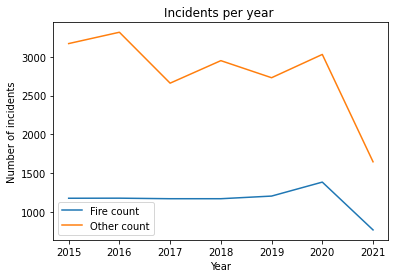

In [53]:

x1 = df_merge_fire_other_year.year
y1 = df_merge_fire_other_year.fire_count
# plotting the line 1 points 
plt.plot(x1, y1, label = "Fire count")
# line 2 points
x2 = df_merge_fire_other_year.year
y2 = df_merge_fire_other_year.other_count
# plotting the line 2 points 
plt.plot(x2, y2, label = "Other count")
plt.xlabel('Year')
# Set the y axis label of the current axis.
plt.ylabel('Number of incidents')
# Set a title of the current axes.
plt.title('Incidents per year ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()


As we can see, the rate of other types fire had a downward trend, while this figure for fire remainded approximately constant till 2019, and slighlty increased in 2020. As the data for 2021 is not complete, we cannot compare the number of incidents in this year with the previous years.

In [54]:
len(incident.NOM_ARROND.unique())

20

# Time series Modeling


### For the time series anaysis, we need the date of the incident and the number of incidents occured.For this, we need to filter the incidents data frame.


In [55]:
montreal_filtered_fire_incidents = incident[["Month","Year"]][incident["DESCRIPTION_GROUPE"]=='fire']
montreal_filtered_fire_incidents.reset_index(drop=True,inplace=True)
montreal_filtered_fire_incidents.head()
montreal_filtered_fire_incidents["count"]=1

### In order to aggregate the number of incidents for each month, first we need to change the month name to a number and assign the first day of each month as a representative of the whole month.

In [56]:
from datetime import datetime
def convert_month_name_to_number(name):
    m=str(datetime.strptime(name, "%B").month)
    if len(m) ==1:
        m = '0'+ m
        
    return m

In [57]:
montreal_filtered_fire_incidents['month_number']=montreal_filtered_fire_incidents.Month.apply(convert_month_name_to_number)


In [58]:
montreal_filtered_fire_incidents['day']='01'

In [59]:
montreal_filtered_fire_incidents['Year'] = montreal_filtered_fire_incidents['Year'].astype(str)

In [60]:
montreal_filtered_fire_incidents['Modeling_date'] = pd.to_datetime(montreal_filtered_fire_incidents[['Year', 'month_number','day']].astype(str).agg('-'.join, axis=1))

In [61]:
montreal_filtered_fire_incidents.drop(['Year','Month','month_number','day'],axis=1,inplace=True)

In [62]:
montreal_filtered_fire_incidents.head()

,count,Modeling_date
0,1,2015-01-01
1,1,2015-02-01
2,1,2015-05-01
3,1,2015-05-01
4,1,2016-03-01


In [63]:
montreal_agg_fire_incidents = montreal_filtered_fire_incidents.groupby(["Modeling_date"]).sum()

In [64]:
montreal_agg_fire_incidents.head()

,count
Modeling_date,
2015-01-01,104
2015-02-01,113
2015-03-01,121
2015-04-01,96
2015-05-01,103


### To investigate the data, we plot it to see if it is seasonal and to see how the trend is.

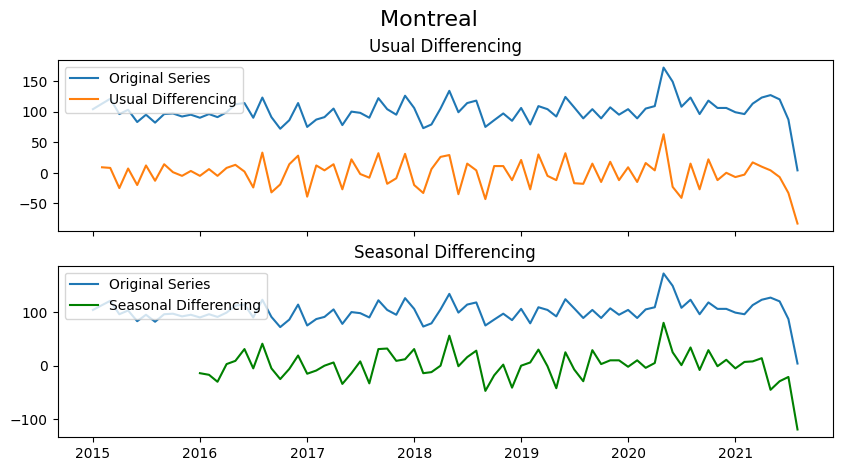

In [65]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(montreal_agg_fire_incidents[:], label='Original Series')
axes[0].plot(montreal_agg_fire_incidents[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(montreal_agg_fire_incidents[:], label='Original Series')
axes[1].plot(montreal_agg_fire_incidents[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Montreal ', fontsize=16)
plt.show()

### Test to see if the data is stationary

In [88]:
def stat_test1(df):
    # Test to see if the data is stationary
    from pmdarima.arima import ADFTest
    adf_test = ADFTest(alpha = 0.05)
    return adf_test.should_diff(df),df

In [89]:
z,df = stat_test1(montreal_agg_fire_incidents)
print(z)

(0.02256849120613596, False)


### It is not stationary, so we run the autoarima to find the best value for d, p, q

### The data before Jan first 2021 will be assigned for training and the data after that will bed used for testing

In [66]:
df_train = montreal_agg_fire_incidents[montreal_agg_fire_incidents.index<"2021-01-01"]
df_test = montreal_agg_fire_incidents[montreal_agg_fire_incidents.index>="2021-01-01"]

In [67]:
df_train.tail()

,count
Modeling_date,
2020-08-01,123
2020-09-01,96
2020-10-01,118
2020-11-01,106
2020-12-01,106


### To find the best P,Q,D for our ARIMA model, we use auto_ARIMA.

In [68]:
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(df_train, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=536.036, Time=1.14 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=554.378, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=530.940, Time=0.41 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=553.643, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=556.376, Time=0.11 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=532.443, Time=0.99 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=531.862, Time=0.51 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=3.14 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=529.325, Time=0.24 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=531.000, Time=0.76 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=530.572, Time=0.44 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=532.866, Time=0.27 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=in

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:                        y   No. Observations:                   72
Model:             SARIMAX(1, 1, 0, 12)   Log Likelihood                -261.663
Date:                  Mon, 09 Aug 2021   AIC                            529.325
Time:                          13:08:06   BIC                            535.608
Sample:                               0   HQIC                           531.783
                                   - 72                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.4766      2.519      1.777      0.076      -0.460       9.413
ar.S.L12      -0.6587      0.107     -6.183      0.000      -0.868      -0.450
sigma2       320.7201     69.598      4.608      0.000     184.310     457.131
===================================================================================
Ljung-Box (L1) (Q):                   0.29   Jarque-Bera (JB):                 0.47
Prob(Q):                              0.59   Prob(JB):                         0.79
Heteroskedasticity (H):               1.04   Skew:                             0.19
Prob(H) (two-sided):                  0.93   Kurtosis:                         2.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### To see how accurate our model predicts the future data, we predict its 8 future steps(months) and then compare it with our test set results.

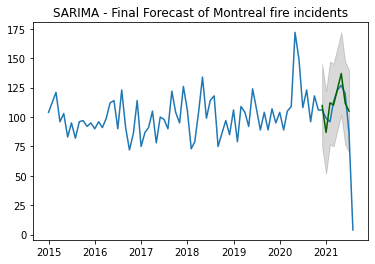

In [69]:
# Forecast
n_periods = 8
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(df_train.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(montreal_agg_fire_incidents)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of Montreal fire incidents")
plt.show()

### Here, we can see the predicted results and the expected ones and at the end we calculate RSME( Root mean square error) to see how accurate  the predictions are.

In [70]:
expected = df_test['count'][:7]

for i in range(7):
    print("predicted value is:", fitted_series[i+1],"expexted value is:",expected[i])

from sklearn.metrics import mean_squared_error
from math import sqrt
rsme = sqrt(mean_squared_error(expected, fitted_series[1:]))
print(rsme)

predicted value is: 86.88931095869209 expexted value is: 99
predicted value is: 112.11155563107577 expexted value is: 96
predicted value is: 110.1829697702577 expexted value is: 113
predicted value is: 123.77808759677369 expexted value is: 123
predicted value is: 137.0083345239953 expexted value is: 127
predicted value is: 111.81789681951017 expexted value is: 120
predicted value is: 105.07974866317721 expexted value is: 87
11.394127420085917


### As is shown below, the accuracy of our model for the test period is 0.89.

In [71]:
accuracy = 1- (rsme / expected.mean())
print(accuracy)

0.8957400105351615


### This method also can be carried out for each of the neighborhoods separetely. The steps would be the same, but this time the aggregation will be done by both the neighborhood name and the date. 

In [72]:
filtered_fire_icidents = incident[["NOM_ARROND","Month","Year"]][incident["DESCRIPTION_GROUPE"]=='fire']
filtered_fire_icidents.reset_index(drop=True,inplace=True)
filtered_fire_icidents.head()
filtered_fire_icidents["count"]=1

In [73]:
agg_fire_incidents = filtered_fire_icidents.groupby(["NOM_ARROND","Year","Month"]).sum()

In [74]:
agg_fire_incidents.reset_index(inplace=True)
agg_fire_incidents.head()

,NOM_ARROND,Year,Month,count
0,Ahuntsic / Cartierville,2015,April,5
1,Ahuntsic / Cartierville,2015,August,5
2,Ahuntsic / Cartierville,2015,December,6
3,Ahuntsic / Cartierville,2015,February,7
4,Ahuntsic / Cartierville,2015,January,9


In [75]:
filtered_other_icidents = incident[["NOM_ARROND","Month","Year"]][incident["DESCRIPTION_GROUPE"]=='other fire type']
filtered_other_icidents.reset_index(drop=True,inplace=True)
filtered_other_icidents.head()
filtered_other_icidents["count"]=1

In [76]:
agg_other_icidents = filtered_other_icidents.groupby(["NOM_ARROND","Year","Month"]).sum()

In [77]:
agg_other_icidents.reset_index(inplace=True)
agg_other_icidents.head()

,NOM_ARROND,Year,Month,count
0,Ahuntsic / Cartierville,2015,April,21
1,Ahuntsic / Cartierville,2015,August,18
2,Ahuntsic / Cartierville,2015,December,4
3,Ahuntsic / Cartierville,2015,February,7
4,Ahuntsic / Cartierville,2015,January,4


In [78]:
agg_fire_incidents['month_number']=agg_fire_incidents.Month.apply(convert_month_name_to_number)
agg_fire_incidents.head()

,NOM_ARROND,Year,Month,count,month_number
0,Ahuntsic / Cartierville,2015,April,5,04
1,Ahuntsic / Cartierville,2015,August,5,08
2,Ahuntsic / Cartierville,2015,December,6,12
3,Ahuntsic / Cartierville,2015,February,7,02
4,Ahuntsic / Cartierville,2015,January,9,01


In [79]:
agg_fire_incidents['day']='01'

In [80]:
agg_fire_incidents['Year'] = agg_fire_incidents['Year'].astype(str)

In [81]:
agg_fire_incidents['Modeling_date'] = pd.to_datetime(agg_fire_incidents[['Year', 'month_number','day']].astype(str).agg('-'.join, axis=1))

In [82]:
agg_fire_incidents.head()

,NOM_ARROND,Year,Month,count,month_number,day,Modeling_date
0,Ahuntsic / Cartierville,2015,April,5,04,01,2015-04-01
1,Ahuntsic / Cartierville,2015,August,5,08,01,2015-08-01
2,Ahuntsic / Cartierville,2015,December,6,12,01,2015-12-01
3,Ahuntsic / Cartierville,2015,February,7,02,01,2015-02-01
4,Ahuntsic / Cartierville,2015,January,9,01,01,2015-01-01


In [83]:
agg_fire_incidents.drop(['Year','Month','month_number','day'],axis=1,inplace=True)

In [84]:
agg_fire_incidents.head()

,NOM_ARROND,count,Modeling_date
0,Ahuntsic / Cartierville,5,2015-04-01
1,Ahuntsic / Cartierville,5,2015-08-01
2,Ahuntsic / Cartierville,6,2015-12-01
3,Ahuntsic / Cartierville,7,2015-02-01
4,Ahuntsic / Cartierville,9,2015-01-01


In [85]:
agg_fire_incidents = agg_fire_incidents.set_index(['Modeling_date'])

In [86]:
agg_fire_incidents.head()

,NOM_ARROND,count
Modeling_date,,
2015-04-01,Ahuntsic / Cartierville,5
2015-08-01,Ahuntsic / Cartierville,5
2015-12-01,Ahuntsic / Cartierville,6
2015-02-01,Ahuntsic / Cartierville,7
2015-01-01,Ahuntsic / Cartierville,9


In [90]:
Names = agg_fire_incidents['NOM_ARROND'].unique()
Names

array(['Ahuntsic / Cartierville', 'Anjou',
       'Côte-des-Neiges / Notre-Dame-de-Grâce', 'Indéterminé',
       "L'Ile-Bizard / Ste-Geneviève", 'Lachine', 'Lasalle',
       'Mercier / Hochelaga-Maisonneuve', 'Montréal-Nord', 'Outremont',
       'Pierrefonds / Roxboro', 'Plateau Mont-Royal',
       'Rivière-des-Prairies / Pointe-aux-Trembles',
       'Rosemont / Petite-Patrie', 'Saint-Laurent', 'Saint-Léonard',
       'Sud-Ouest', 'Verdun', 'Ville-Marie',
       'Villeray / St-Michel / Parc Extension'], dtype=object)

In [94]:
def plot_dataframe(df):
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt

    #Plotting the data for each dataframe
    plt.figure(figsize = (8,5))
    ax = plt.gca()
    ax.xaxis.set_major_locator(plt.MaxNLocator(20))
    plt.xticks(rotation = 45)
    plt.plot(df.Modeling_date,df['count'])
    plt.show()

### The neighborhood chosen as an example is Anjou

In [95]:
df = agg_fire_incidents[agg_fire_incidents['NOM_ARROND']=='Anjou']
df.drop(columns=['NOM_ARROND'],inplace=True)
df = df.reset_index()
df.sort_values(['Modeling_date'],inplace=True)
df.head()

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Modeling_date,count
2,2015-01-01,3
4,2015-03-01,1
0,2015-04-01,1
5,2015-05-01,2
3,2015-06-01,3


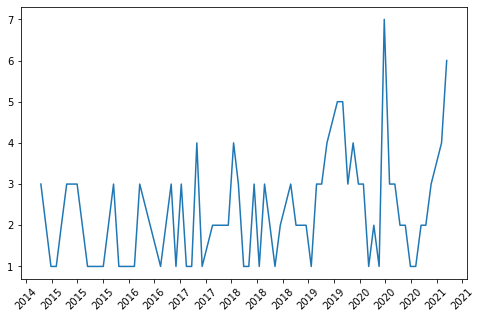

In [96]:
plot_dataframe(df)

In [108]:
def stat_test(df):
    # Test to see if the data is stationary
    from pmdarima.arima import ADFTest
#     df['Modeling_date'] = pd.to_datetime( df['Modeling_date'], format='%Y-%m-%d')
#     df= df.set_index('Modeling_date')
    adf_test = ADFTest(alpha = 0.05)
    return adf_test.should_diff(df),df

### Using the above function, we can test whether our data is stationary or not.

In [109]:
x,df = stat_test(df)
print(x)

(0.03252310098117147, False)


In [100]:
df.head()

,count
Modeling_date,
2015-01-01,3
2015-03-01,1
2015-04-01,1
2015-05-01,2
2015-06-01,3


### We used auto ARIMA to find the best p,q,d for this data set

In [ ]:
df_train = df[df.index<"2021-01-01"]
df_test = df[df.index>="2020-01-01"]

In [ ]:
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(df_train, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

In [ ]:
# Forecast
n_periods = 7
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(df_train.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of a10 - Drug Sales")
plt.show()

In [ ]:
expected = pd.Series(df['count'])[-7:]

In [ ]:
for i in range(7):
    print("predicted value is:", fitted_series[i],"expexted value is:",expected[i])

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rsme = sqrt(mean_squared_error(expected, fitted_series))
print(rsme)

In [ ]:
accuracy = 1- (rsme / expected.mean())
print(accuracy)

### As the data for each single neighborhood is insufficient, in some months no fire incidents was reported, the model accuracy is not comparable with the one for the whole city of Montreal, being 45% vs 89%